In [1]:
from stable_animations import prompt_to_images, imgs_to_video
from IPython.display import display
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import (
    AutoencoderKL,
    UNet2DConditionModel,
    DDIMScheduler
)

In [3]:
device = "mps"  # or "cuda"
model_id = "runwayml/stable-diffusion-v1-5"

In [4]:
# initialize models in the pipeline
tokenizer = CLIPTokenizer.from_pretrained(
    "openai/clip-vit-large-patch14", torch_dtype=torch.float16
)

text_encoder = CLIPTextModel.from_pretrained(
    "openai/clip-vit-large-patch14", torch_dtype=torch.float16
).to(device)

vae = AutoencoderKL.from_pretrained(
    model_id, subfolder="vae", torch_dtype=torch.float16
).to(device)

scheduler = DDIMScheduler.from_config(model_id, subfolder="scheduler")

unet = UNet2DConditionModel.from_pretrained(
    model_id, subfolder="unet", torch_dtype=torch.float16
).to(device)

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.18.self_attn.q_proj.bias', 'vision_model.encoder.layers.22.mlp.fc1.bias', 'vision_model.encoder.layers.1.layer_norm2.bias', 'vision_model.encoder.layers.21.mlp.fc2.weight', 'vision_model.post_layernorm.weight', 'vision_model.embeddings.position_embedding.weight', 'vision_model.encoder.layers.21.mlp.fc2.bias', 'vision_model.encoder.layers.23.self_attn.k_proj.bias', 'vision_model.encoder.layers.6.self_attn.v_proj.bias', 'vision_model.encoder.layers.8.mlp.fc2.bias', 'vision_model.encoder.layers.17.self_attn.k_proj.weight', 'vision_model.encoder.layers.7.layer_norm1.weight', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'visual_projection.weight', 'vision_model.encoder.layers.21.self_attn.k_proj.weight', 'vision_model.encoder.layers.18.self_attn.v_proj.bias', 'vision_model.encoder.layers.6.self_attn.k_proj.weight', 'vision_model.encoder.layers

In [5]:
images = prompt_to_images(
    prompt=["A beautiful green forest"],  # only 1 prompt supported for now
    device=device,
    tokenizer=tokenizer,
    scheduler=scheduler,
    text_encoder=text_encoder,
    vae=vae,
    unet=unet,
    n=0,  # number of interpolated instances (0 returns only beginning and end image)
    radius=0.2,  # higher values generate a more different end image
    g=12.5,
    start_seed=0,  # seed for the starting image
    end_seed=0,  # seed for the ending image (depends also from the start seed)
    steps=70,
    width=320,
    height=704,
    folder=None,  # if not None saves all the images
    interpolation_fn=None  # linear interpolation by default
)

  0%|          | 0/2 [00:00<?, ?it/s]

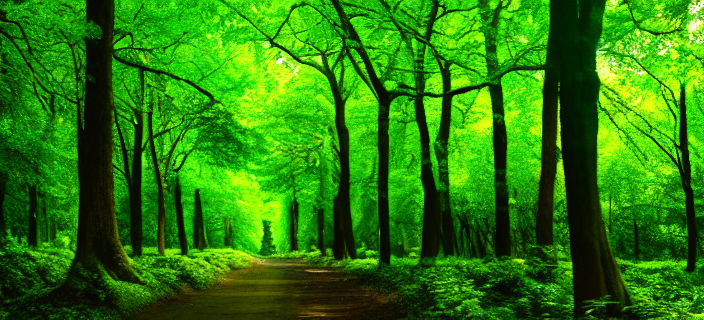

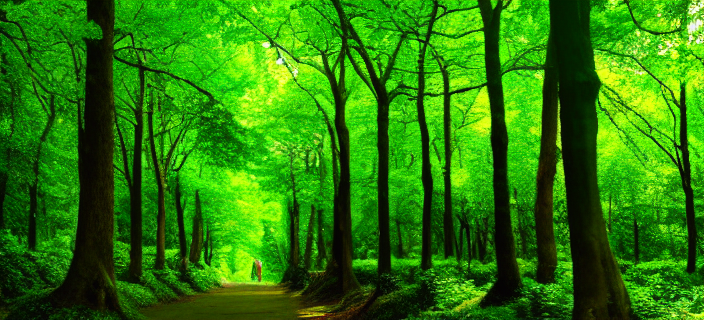

In [6]:
for img in images:
    display(img)

In [10]:
video = imgs_to_video(images, video_name="forest.mp4")